In [ ]:
#Transfer learning is a technique that involves using a pre-trained model on a new task. This can be a very effective way to improve the performance of a model, as the pre-trained model has already learned some useful features

#Basic Idea:
	#basic idea of transfer learning is to take a model that has been trained on a large dataset of data and use it to train a new model on a smaller dataset of data. The pre-trained model is used as a starting point for the new model, and the weights of the pre-trained model are fine-tuned on the new dataset of data.

In [2]:
from keras.applications import VGG16
#VGG16 is a convolutional neural network (CNN) architecture
# It is a very deep network with 16 layers, which makes it capable of learning very complex patterns in images.
#used for- img classi, obj dete,img segmentation
#often used as a starting point for transfer learning. 

from keras.models import Model
from keras.layers import Dense,Flatten
from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
#ImageDataGenerator is a tool that simplifies the process of using transfer learning for image classification tasks. It allows you to automatically generate augmented data, which involves modifying existing images to create variations that the model can learn from. This helps the model become more robust and generalize better to new data
import numpy as np

In [7]:
#he Caltech-101 dataset is a collection of 101 categories of objects, with approximately 800 images per category.
dataset_datagen=ImageDataGenerator(rescale=1.0/255,)# The rescale parameter is set to 1.0/255, which will normalize the pixel values of the images in the dataset to be between 0 and 1.

#batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(  #generate batches of data from the Caltech-101 dataset
    "./caltech-101-img", #path to ds
    target_size=(64, 64), 
    batch_size=2000,
)

Found 9144 images belonging to 102 classes.


In [12]:
#split the dataset into training and testing sets
x_train,y_train=dataset_generator[0]
x_test,y_test=dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [17]:
vggPath = "./datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
#The VGG16 weights file contains the weights that were learned when the VGG16 model was trained on the ImageNet dataset.
base_model = VGG16(False, vggPath, input_shape=(64, 64, 3))
#The include_top parameter is set to False, which means that the top layer of the VGG16 model, which is a fully connected layer that is used for image classification, will not be included in the new model. 

In [19]:
for layer in base_model.layers:
   layer.trainable = False
#sets the trainable attribute of the current layer to False. This means that the weights of the layer will not be updated during training.

In [21]:
x = Flatten()(base_model.output)
# Explanation: This line adds a Flatten layer to the output of the base_model. The Flatten layer is used to transform the 3D tensor output from the convolutional base (which is usually the output of the last convolutional layer) into a 1D tensor. This flattening step is necessary when transitioning from convolutional layers to densely connected layers.
# Example: Suppose the output shape of base_model is (7, 7, 512). This means you have a 3D tensor with dimensions 7x7x512. Applying the Flatten layer converts this 3D tensor into a 1D tensor by unraveling the values along the dimensions. In this case, the resulting 1D tensor would have a size of 7 * 7 * 512 = 25088.
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile("adam", 'categorical_crossentropy', ['accuracy'])

In [23]:
model.fit(x_train, y_train, batch_size=128, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
16/16 [==============================] - 83s 5s/step - loss: 2.8746 - accuracy: 0.3660 - val_loss: 2.9631 - val_accuracy: 0.3770
Epoch 2/2
16/16 [==============================] - 91s 6s/step - loss: 2.5445 - accuracy: 0.4445 - val_loss: 2.7472 - val_accuracy: 0.4225


In [24]:
import tensorflow as tf

##
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3)) #creates new VGG16 model 

# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
#i.e. weights of these layers will not be updated during training


#-----
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
#i.e. weights of these layers will be updates


# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)

#-----
x = tf.keras.layers.Dropout(0.3)(x)


predictions = Dense(102, activation='softmax')(x)


# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(Adam(learning_rate=0.001), 'categorical_crossentropy', ['accuracy'])

# training fine tuned model
model.fit(x_train, y_train, batch_size=128, epochs=2, validation_data=(x_test, y_test))


Epoch 1/2
16/16 [==============================] - 91s 6s/step - loss: 3.3306 - accuracy: 0.3100 - val_loss: 2.5704 - val_accuracy: 0.4285
Epoch 2/2
16/16 [==============================] - 92s 6s/step - loss: 1.9450 - accuracy: 0.5510 - val_loss: 1.9941 - val_accuracy: 0.5395


In [26]:
predicted_value = model.predict(x_test)
predicted_value

63/63 [==============================] - 42s 668ms/step


array([[4.34928434e-03, 9.89965260e-01, 3.62784958e-05, ...,
        2.02369776e-07, 2.82671408e-07, 1.37792154e-06],
       [8.13188910e-01, 3.99823011e-06, 1.64881931e-05, ...,
        3.43916254e-05, 1.29031643e-04, 2.45643387e-05],
       [1.76951662e-01, 6.80106459e-05, 2.94061494e-04, ...,
        1.23513571e-03, 1.18067407e-03, 6.65903674e-04],
       ...,
       [1.06892295e-01, 1.49879768e-03, 1.78124334e-04, ...,
        3.70609434e-03, 4.37091076e-04, 3.59265920e-04],
       [8.37401375e-02, 4.86361329e-04, 1.54503417e-04, ...,
        2.20164726e-03, 9.69434986e-05, 6.73791728e-05],
       [3.00895363e-01, 4.10782050e-05, 9.08714574e-05, ...,
        8.06437153e-03, 5.60559507e-04, 4.99161142e-05]], dtype=float32)

In [27]:
import matplotlib.pyplot as plt

In [28]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  airplanes
Actual:  airplanes


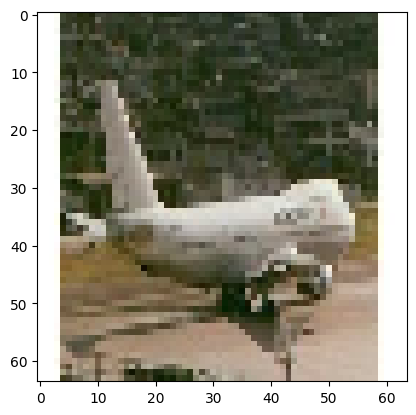

In [30]:
n=101

plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])